In [1]:
!pip install gensim


In [2]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

print("Available models:", api.info()['models'].keys())


Available models: dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [9]:
# LOAD SMALLER MODELS (IMPORTANT FIX)

glove = api.load("glove-wiki-gigaword-100")


In [4]:
# SIMILARITY

print("\nSimilarity king & queen:", glove.similarity("king", "queen"))



Similarity king & queen: 0.7507691


In [5]:
# ANALOGY

print("\nAnalogy king - man + woman:")
print(glove.most_similar(positive=['king','woman'], negative=['man'], topn=1))



Analogy king - man + woman:
[('queen', 0.7698540687561035)]


In [6]:
# OOV TEST

oov_word = "cricketerxyz"

print("\nTesting OOV word:", oov_word)

# GloVe
if oov_word in glove:
    print("GloVe has the word.")
else:
    print("GloVe OOV ")



Testing OOV word: cricketerxyz
GloVe OOV 


In [7]:
# FastText
try:
    vec = fasttext.get_vector(oov_word)
    print("FastText generated vector ")
except:
    print("FastText failed ")


FastText failed 


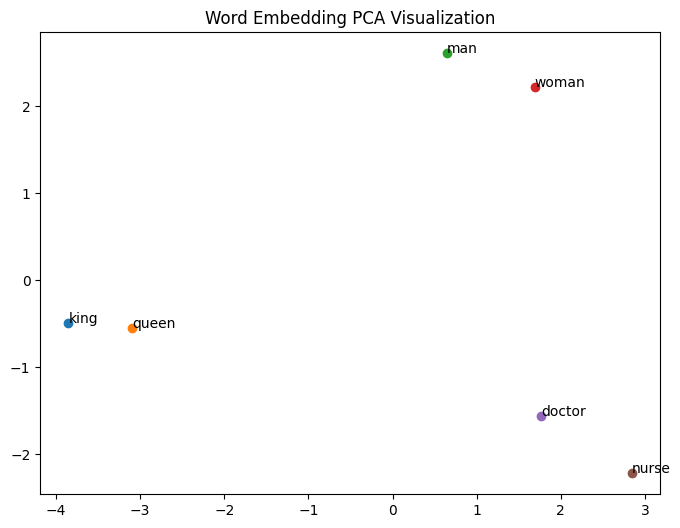

In [8]:
# PCA VISUALIZATION

words = ["king", "queen", "man", "woman", "doctor", "nurse"]
vectors = [glove[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    plt.scatter(result[i,0], result[i,1])
    plt.annotate(word, (result[i,0], result[i,1]))

plt.title("Word Embedding PCA Visualization")
plt.show()
